In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Activation, Dense, Dot
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import LearningRateScheduler

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# Functions for visualising the output

import matplotlib.pyplot as plt

def draw_grid(grid, ax, title):
    for (x, y), val in grid.items():
        ax.text(x, y, str(val), ha='center', va='center', fontsize=8, fontweight='bold', color='white')
        ax.plot(x, y, marker='s', markersize=16, color='blue')
    
    ax.set_xlim(-11, 11)
    ax.set_ylim(-11, 11)
    ax.set_xticks(range(-10, 11))
    ax.set_yticks(range(-10, 11))
    ax.set_aspect('equal')
    ax.grid(True)
    ax.set_axisbelow(True)
    ax.set_title(title)

def convert_data_to_grid(k_list,label_list):
    grid = {}
    for i in range(len(k_list)):
        x, y = k_list[i]
        val = label_list[i]
        if val != 0:
            grid[(x, y)] = val
    return grid

# Setting up the model

## Comments

* While it is conceptually obvious to fix the weights which map the hyperplane logistic regression outputs to domain labels, the result is that the model very frequently becomes stuck in a bad local minimum. Making these weights trainable results in far better performance. (Is there a general lesson here about how in-principle redundant flexibility results in better avoidance of bad local minima?)
*  In training the below model there is a significant chance of getting stuck in a bad local minimum. One way to attempt to deal with this is to use a decaying learning rate.

In [3]:
num_hyps = 2
num_doms = 2*num_hyps
hyps_to_doms_params = [
[-3+1/2,2,2],
[-1+1/2,2,-2],
[-1+1/2,-2,2],
[1+1/2,-2,-2]]
# Note that the +1/2 terms mean that a boundary gets contributions from the polynomials on either side

temp = [
[1,0],
[0,1]
]
temp_array = 200*np.array(temp)

weights_array = 200*np.transpose(hyps_to_doms_params)[1:]
bias_array = 200*np.transpose(hyps_to_doms_params)[0]

k_input = Input(shape=(2,), name='k_input')
# Layer for performing the hyperplane logistic regressions:
# doms_hidden = Dense(units=num_hyps, input_shape=(2,), 
#         activation='sigmoid',
#         use_bias=False, name='doms_hidden')(k_input)
doms_hidden = Dense(units=num_hyps, input_shape=(2,), 
        activation='sigmoid', use_bias=False,
        #trainable=False, weights=[temp_array],
        name='doms_hidden')(k_input)
# Layer for mapping the hyperplane conditions to region conditions:
doms_out = Dense(units=num_doms,
        activation='sigmoid',
        #trainable=False, weights=[weights_array, bias_array],
        bias_initializer='ones', name='doms_out')(doms_hidden)

k_quad_input = Input(shape=(6,), name='k_quad_input')
# Layer for mapping [1,k1,k2,k1^2,k1*k2,k2^2] to polynomials for each region:
pols_out = Dense(units=num_doms, input_shape=(6,), 
        use_bias=False, name='pols_out')(k_quad_input)

final_pol_out = Dot(axes=1)([doms_out,pols_out])

model = Model(inputs=[k_input,k_quad_input], outputs=[final_pol_out])

print(model.summary())

model.compile(optimizer=Adam(learning_rate=1), loss='mean_squared_error')

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 k_input (InputLayer)           [(None, 2)]          0           []                               
                                                                                                  
 doms_hidden (Dense)            (None, 2)            4           ['k_input[0][0]']                
                                                                                                  
 k_quad_input (InputLayer)      [(None, 6)]          0           []                               
                                                                                                  
 doms_out (Dense)               (None, 4)            12          ['doms_hidden[0][0]']            
                                                                                              

# Training the model

In [4]:
k_list = [[-10,-10],[-10,-9],[-10,-8],[-10,-7],[-10,-6],[-10,-5],[-10,-4],[-10,-3],[-10,-2],[-10,-1],[-10,0],[-10,1],[-10,2],[-10,3],[-10,4],[-10,5],[-10,6],[-10,7],[-10,8],[-10,9],[-10,10],[-9,-10],[-9,-9],[-9,-8],[-9,-7],[-9,-6],[-9,-5],[-9,-4],[-9,-3],[-9,-2],[-9,-1],[-9,0],[-9,1],[-9,2],[-9,3],[-9,4],[-9,5],[-9,6],[-9,7],[-9,8],[-9,9],[-9,10],[-8,-10],[-8,-9],[-8,-8],[-8,-7],[-8,-6],[-8,-5],[-8,-4],[-8,-3],[-8,-2],[-8,-1],[-8,0],[-8,1],[-8,2],[-8,3],[-8,4],[-8,5],[-8,6],[-8,7],[-8,8],[-8,9],[-8,10],[-7,-10],[-7,-9],[-7,-8],[-7,-7],[-7,-6],[-7,-5],[-7,-4],[-7,-3],[-7,-2],[-7,-1],[-7,0],[-7,1],[-7,2],[-7,3],[-7,4],[-7,5],[-7,6],[-7,7],[-7,8],[-7,9],[-7,10],[-6,-10],[-6,-9],[-6,-8],[-6,-7],[-6,-6],[-6,-5],[-6,-4],[-6,-3],[-6,-2],[-6,-1],[-6,0],[-6,1],[-6,2],[-6,3],[-6,4],[-6,5],[-6,6],[-6,7],[-6,8],[-6,9],[-6,10],[-5,-10],[-5,-9],[-5,-8],[-5,-7],[-5,-6],[-5,-5],[-5,-4],[-5,-3],[-5,-2],[-5,-1],[-5,0],[-5,1],[-5,2],[-5,3],[-5,4],[-5,5],[-5,6],[-5,7],[-5,8],[-5,9],[-5,10],[-4,-10],[-4,-9],[-4,-8],[-4,-7],[-4,-6],[-4,-5],[-4,-4],[-4,-3],[-4,-2],[-4,-1],[-4,0],[-4,1],[-4,2],[-4,3],[-4,4],[-4,5],[-4,6],[-4,7],[-4,8],[-4,9],[-4,10],[-3,-10],[-3,-9],[-3,-8],[-3,-7],[-3,-6],[-3,-5],[-3,-4],[-3,-3],[-3,-2],[-3,-1],[-3,0],[-3,1],[-3,2],[-3,3],[-3,4],[-3,5],[-3,6],[-3,7],[-3,8],[-3,9],[-3,10],[-2,-10],[-2,-9],[-2,-8],[-2,-7],[-2,-6],[-2,-5],[-2,-4],[-2,-3],[-2,-2],[-2,-1],[-2,0],[-2,1],[-2,2],[-2,3],[-2,4],[-2,5],[-2,6],[-2,7],[-2,8],[-2,9],[-2,10],[-1,-10],[-1,-9],[-1,-8],[-1,-7],[-1,-6],[-1,-5],[-1,-4],[-1,-3],[-1,-2],[-1,-1],[-1,0],[-1,1],[-1,2],[-1,3],[-1,4],[-1,5],[-1,6],[-1,7],[-1,8],[-1,9],[-1,10],[0,-10],[0,-9],[0,-8],[0,-7],[0,-6],[0,-5],[0,-4],[0,-3],[0,-2],[0,-1],[0,0],[0,1],[0,2],[0,3],[0,4],[0,5],[0,6],[0,7],[0,8],[0,9],[0,10],[1,-10],[1,-9],[1,-8],[1,-7],[1,-6],[1,-5],[1,-4],[1,-3],[1,-2],[1,-1],[1,0],[1,1],[1,2],[1,3],[1,4],[1,5],[1,6],[1,7],[1,8],[1,9],[1,10],[2,-10],[2,-9],[2,-8],[2,-7],[2,-6],[2,-5],[2,-4],[2,-3],[2,-2],[2,-1],[2,0],[2,1],[2,2],[2,3],[2,4],[2,5],[2,6],[2,7],[2,8],[2,9],[2,10],[3,-10],[3,-9],[3,-8],[3,-7],[3,-6],[3,-5],[3,-4],[3,-3],[3,-2],[3,-1],[3,0],[3,1],[3,2],[3,3],[3,4],[3,5],[3,6],[3,7],[3,8],[3,9],[3,10],[4,-10],[4,-9],[4,-8],[4,-7],[4,-6],[4,-5],[4,-4],[4,-3],[4,-2],[4,-1],[4,0],[4,1],[4,2],[4,3],[4,4],[4,5],[4,6],[4,7],[4,8],[4,9],[4,10],[5,-10],[5,-9],[5,-8],[5,-7],[5,-6],[5,-5],[5,-4],[5,-3],[5,-2],[5,-1],[5,0],[5,1],[5,2],[5,3],[5,4],[5,5],[5,6],[5,7],[5,8],[5,9],[5,10],[6,-10],[6,-9],[6,-8],[6,-7],[6,-6],[6,-5],[6,-4],[6,-3],[6,-2],[6,-1],[6,0],[6,1],[6,2],[6,3],[6,4],[6,5],[6,6],[6,7],[6,8],[6,9],[6,10],[7,-10],[7,-9],[7,-8],[7,-7],[7,-6],[7,-5],[7,-4],[7,-3],[7,-2],[7,-1],[7,0],[7,1],[7,2],[7,3],[7,4],[7,5],[7,6],[7,7],[7,8],[7,9],[7,10],[8,-10],[8,-9],[8,-8],[8,-7],[8,-6],[8,-5],[8,-4],[8,-3],[8,-2],[8,-1],[8,0],[8,1],[8,2],[8,3],[8,4],[8,5],[8,6],[8,7],[8,8],[8,9],[8,10],[9,-10],[9,-9],[9,-8],[9,-7],[9,-6],[9,-5],[9,-4],[9,-3],[9,-2],[9,-1],[9,0],[9,1],[9,2],[9,3],[9,4],[9,5],[9,6],[9,7],[9,8],[9,9],[9,10],[10,-10],[10,-9],[10,-8],[10,-7],[10,-6],[10,-5],[10,-4],[10,-3],[10,-2],[10,-1],[10,0],[10,1],[10,2],[10,3],[10,4],[10,5],[10,6],[10,7],[10,8],[10,9],[10,10]]
kquad_list = [[1,-10,-10,100,100,100],[1,-10,-9,100,90,81],[1,-10,-8,100,80,64],[1,-10,-7,100,70,49],[1,-10,-6,100,60,36],[1,-10,-5,100,50,25],[1,-10,-4,100,40,16],[1,-10,-3,100,30,9],[1,-10,-2,100,20,4],[1,-10,-1,100,10,1],[1,-10,0,100,0,0],[1,-10,1,100,-10,1],[1,-10,2,100,-20,4],[1,-10,3,100,-30,9],[1,-10,4,100,-40,16],[1,-10,5,100,-50,25],[1,-10,6,100,-60,36],[1,-10,7,100,-70,49],[1,-10,8,100,-80,64],[1,-10,9,100,-90,81],[1,-10,10,100,-100,100],[1,-9,-10,81,90,100],[1,-9,-9,81,81,81],[1,-9,-8,81,72,64],[1,-9,-7,81,63,49],[1,-9,-6,81,54,36],[1,-9,-5,81,45,25],[1,-9,-4,81,36,16],[1,-9,-3,81,27,9],[1,-9,-2,81,18,4],[1,-9,-1,81,9,1],[1,-9,0,81,0,0],[1,-9,1,81,-9,1],[1,-9,2,81,-18,4],[1,-9,3,81,-27,9],[1,-9,4,81,-36,16],[1,-9,5,81,-45,25],[1,-9,6,81,-54,36],[1,-9,7,81,-63,49],[1,-9,8,81,-72,64],[1,-9,9,81,-81,81],[1,-9,10,81,-90,100],[1,-8,-10,64,80,100],[1,-8,-9,64,72,81],[1,-8,-8,64,64,64],[1,-8,-7,64,56,49],[1,-8,-6,64,48,36],[1,-8,-5,64,40,25],[1,-8,-4,64,32,16],[1,-8,-3,64,24,9],[1,-8,-2,64,16,4],[1,-8,-1,64,8,1],[1,-8,0,64,0,0],[1,-8,1,64,-8,1],[1,-8,2,64,-16,4],[1,-8,3,64,-24,9],[1,-8,4,64,-32,16],[1,-8,5,64,-40,25],[1,-8,6,64,-48,36],[1,-8,7,64,-56,49],[1,-8,8,64,-64,64],[1,-8,9,64,-72,81],[1,-8,10,64,-80,100],[1,-7,-10,49,70,100],[1,-7,-9,49,63,81],[1,-7,-8,49,56,64],[1,-7,-7,49,49,49],[1,-7,-6,49,42,36],[1,-7,-5,49,35,25],[1,-7,-4,49,28,16],[1,-7,-3,49,21,9],[1,-7,-2,49,14,4],[1,-7,-1,49,7,1],[1,-7,0,49,0,0],[1,-7,1,49,-7,1],[1,-7,2,49,-14,4],[1,-7,3,49,-21,9],[1,-7,4,49,-28,16],[1,-7,5,49,-35,25],[1,-7,6,49,-42,36],[1,-7,7,49,-49,49],[1,-7,8,49,-56,64],[1,-7,9,49,-63,81],[1,-7,10,49,-70,100],[1,-6,-10,36,60,100],[1,-6,-9,36,54,81],[1,-6,-8,36,48,64],[1,-6,-7,36,42,49],[1,-6,-6,36,36,36],[1,-6,-5,36,30,25],[1,-6,-4,36,24,16],[1,-6,-3,36,18,9],[1,-6,-2,36,12,4],[1,-6,-1,36,6,1],[1,-6,0,36,0,0],[1,-6,1,36,-6,1],[1,-6,2,36,-12,4],[1,-6,3,36,-18,9],[1,-6,4,36,-24,16],[1,-6,5,36,-30,25],[1,-6,6,36,-36,36],[1,-6,7,36,-42,49],[1,-6,8,36,-48,64],[1,-6,9,36,-54,81],[1,-6,10,36,-60,100],[1,-5,-10,25,50,100],[1,-5,-9,25,45,81],[1,-5,-8,25,40,64],[1,-5,-7,25,35,49],[1,-5,-6,25,30,36],[1,-5,-5,25,25,25],[1,-5,-4,25,20,16],[1,-5,-3,25,15,9],[1,-5,-2,25,10,4],[1,-5,-1,25,5,1],[1,-5,0,25,0,0],[1,-5,1,25,-5,1],[1,-5,2,25,-10,4],[1,-5,3,25,-15,9],[1,-5,4,25,-20,16],[1,-5,5,25,-25,25],[1,-5,6,25,-30,36],[1,-5,7,25,-35,49],[1,-5,8,25,-40,64],[1,-5,9,25,-45,81],[1,-5,10,25,-50,100],[1,-4,-10,16,40,100],[1,-4,-9,16,36,81],[1,-4,-8,16,32,64],[1,-4,-7,16,28,49],[1,-4,-6,16,24,36],[1,-4,-5,16,20,25],[1,-4,-4,16,16,16],[1,-4,-3,16,12,9],[1,-4,-2,16,8,4],[1,-4,-1,16,4,1],[1,-4,0,16,0,0],[1,-4,1,16,-4,1],[1,-4,2,16,-8,4],[1,-4,3,16,-12,9],[1,-4,4,16,-16,16],[1,-4,5,16,-20,25],[1,-4,6,16,-24,36],[1,-4,7,16,-28,49],[1,-4,8,16,-32,64],[1,-4,9,16,-36,81],[1,-4,10,16,-40,100],[1,-3,-10,9,30,100],[1,-3,-9,9,27,81],[1,-3,-8,9,24,64],[1,-3,-7,9,21,49],[1,-3,-6,9,18,36],[1,-3,-5,9,15,25],[1,-3,-4,9,12,16],[1,-3,-3,9,9,9],[1,-3,-2,9,6,4],[1,-3,-1,9,3,1],[1,-3,0,9,0,0],[1,-3,1,9,-3,1],[1,-3,2,9,-6,4],[1,-3,3,9,-9,9],[1,-3,4,9,-12,16],[1,-3,5,9,-15,25],[1,-3,6,9,-18,36],[1,-3,7,9,-21,49],[1,-3,8,9,-24,64],[1,-3,9,9,-27,81],[1,-3,10,9,-30,100],[1,-2,-10,4,20,100],[1,-2,-9,4,18,81],[1,-2,-8,4,16,64],[1,-2,-7,4,14,49],[1,-2,-6,4,12,36],[1,-2,-5,4,10,25],[1,-2,-4,4,8,16],[1,-2,-3,4,6,9],[1,-2,-2,4,4,4],[1,-2,-1,4,2,1],[1,-2,0,4,0,0],[1,-2,1,4,-2,1],[1,-2,2,4,-4,4],[1,-2,3,4,-6,9],[1,-2,4,4,-8,16],[1,-2,5,4,-10,25],[1,-2,6,4,-12,36],[1,-2,7,4,-14,49],[1,-2,8,4,-16,64],[1,-2,9,4,-18,81],[1,-2,10,4,-20,100],[1,-1,-10,1,10,100],[1,-1,-9,1,9,81],[1,-1,-8,1,8,64],[1,-1,-7,1,7,49],[1,-1,-6,1,6,36],[1,-1,-5,1,5,25],[1,-1,-4,1,4,16],[1,-1,-3,1,3,9],[1,-1,-2,1,2,4],[1,-1,-1,1,1,1],[1,-1,0,1,0,0],[1,-1,1,1,-1,1],[1,-1,2,1,-2,4],[1,-1,3,1,-3,9],[1,-1,4,1,-4,16],[1,-1,5,1,-5,25],[1,-1,6,1,-6,36],[1,-1,7,1,-7,49],[1,-1,8,1,-8,64],[1,-1,9,1,-9,81],[1,-1,10,1,-10,100],[1,0,-10,0,0,100],[1,0,-9,0,0,81],[1,0,-8,0,0,64],[1,0,-7,0,0,49],[1,0,-6,0,0,36],[1,0,-5,0,0,25],[1,0,-4,0,0,16],[1,0,-3,0,0,9],[1,0,-2,0,0,4],[1,0,-1,0,0,1],[1,0,0,0,0,0],[1,0,1,0,0,1],[1,0,2,0,0,4],[1,0,3,0,0,9],[1,0,4,0,0,16],[1,0,5,0,0,25],[1,0,6,0,0,36],[1,0,7,0,0,49],[1,0,8,0,0,64],[1,0,9,0,0,81],[1,0,10,0,0,100],[1,1,-10,1,-10,100],[1,1,-9,1,-9,81],[1,1,-8,1,-8,64],[1,1,-7,1,-7,49],[1,1,-6,1,-6,36],[1,1,-5,1,-5,25],[1,1,-4,1,-4,16],[1,1,-3,1,-3,9],[1,1,-2,1,-2,4],[1,1,-1,1,-1,1],[1,1,0,1,0,0],[1,1,1,1,1,1],[1,1,2,1,2,4],[1,1,3,1,3,9],[1,1,4,1,4,16],[1,1,5,1,5,25],[1,1,6,1,6,36],[1,1,7,1,7,49],[1,1,8,1,8,64],[1,1,9,1,9,81],[1,1,10,1,10,100],[1,2,-10,4,-20,100],[1,2,-9,4,-18,81],[1,2,-8,4,-16,64],[1,2,-7,4,-14,49],[1,2,-6,4,-12,36],[1,2,-5,4,-10,25],[1,2,-4,4,-8,16],[1,2,-3,4,-6,9],[1,2,-2,4,-4,4],[1,2,-1,4,-2,1],[1,2,0,4,0,0],[1,2,1,4,2,1],[1,2,2,4,4,4],[1,2,3,4,6,9],[1,2,4,4,8,16],[1,2,5,4,10,25],[1,2,6,4,12,36],[1,2,7,4,14,49],[1,2,8,4,16,64],[1,2,9,4,18,81],[1,2,10,4,20,100],[1,3,-10,9,-30,100],[1,3,-9,9,-27,81],[1,3,-8,9,-24,64],[1,3,-7,9,-21,49],[1,3,-6,9,-18,36],[1,3,-5,9,-15,25],[1,3,-4,9,-12,16],[1,3,-3,9,-9,9],[1,3,-2,9,-6,4],[1,3,-1,9,-3,1],[1,3,0,9,0,0],[1,3,1,9,3,1],[1,3,2,9,6,4],[1,3,3,9,9,9],[1,3,4,9,12,16],[1,3,5,9,15,25],[1,3,6,9,18,36],[1,3,7,9,21,49],[1,3,8,9,24,64],[1,3,9,9,27,81],[1,3,10,9,30,100],[1,4,-10,16,-40,100],[1,4,-9,16,-36,81],[1,4,-8,16,-32,64],[1,4,-7,16,-28,49],[1,4,-6,16,-24,36],[1,4,-5,16,-20,25],[1,4,-4,16,-16,16],[1,4,-3,16,-12,9],[1,4,-2,16,-8,4],[1,4,-1,16,-4,1],[1,4,0,16,0,0],[1,4,1,16,4,1],[1,4,2,16,8,4],[1,4,3,16,12,9],[1,4,4,16,16,16],[1,4,5,16,20,25],[1,4,6,16,24,36],[1,4,7,16,28,49],[1,4,8,16,32,64],[1,4,9,16,36,81],[1,4,10,16,40,100],[1,5,-10,25,-50,100],[1,5,-9,25,-45,81],[1,5,-8,25,-40,64],[1,5,-7,25,-35,49],[1,5,-6,25,-30,36],[1,5,-5,25,-25,25],[1,5,-4,25,-20,16],[1,5,-3,25,-15,9],[1,5,-2,25,-10,4],[1,5,-1,25,-5,1],[1,5,0,25,0,0],[1,5,1,25,5,1],[1,5,2,25,10,4],[1,5,3,25,15,9],[1,5,4,25,20,16],[1,5,5,25,25,25],[1,5,6,25,30,36],[1,5,7,25,35,49],[1,5,8,25,40,64],[1,5,9,25,45,81],[1,5,10,25,50,100],[1,6,-10,36,-60,100],[1,6,-9,36,-54,81],[1,6,-8,36,-48,64],[1,6,-7,36,-42,49],[1,6,-6,36,-36,36],[1,6,-5,36,-30,25],[1,6,-4,36,-24,16],[1,6,-3,36,-18,9],[1,6,-2,36,-12,4],[1,6,-1,36,-6,1],[1,6,0,36,0,0],[1,6,1,36,6,1],[1,6,2,36,12,4],[1,6,3,36,18,9],[1,6,4,36,24,16],[1,6,5,36,30,25],[1,6,6,36,36,36],[1,6,7,36,42,49],[1,6,8,36,48,64],[1,6,9,36,54,81],[1,6,10,36,60,100],[1,7,-10,49,-70,100],[1,7,-9,49,-63,81],[1,7,-8,49,-56,64],[1,7,-7,49,-49,49],[1,7,-6,49,-42,36],[1,7,-5,49,-35,25],[1,7,-4,49,-28,16],[1,7,-3,49,-21,9],[1,7,-2,49,-14,4],[1,7,-1,49,-7,1],[1,7,0,49,0,0],[1,7,1,49,7,1],[1,7,2,49,14,4],[1,7,3,49,21,9],[1,7,4,49,28,16],[1,7,5,49,35,25],[1,7,6,49,42,36],[1,7,7,49,49,49],[1,7,8,49,56,64],[1,7,9,49,63,81],[1,7,10,49,70,100],[1,8,-10,64,-80,100],[1,8,-9,64,-72,81],[1,8,-8,64,-64,64],[1,8,-7,64,-56,49],[1,8,-6,64,-48,36],[1,8,-5,64,-40,25],[1,8,-4,64,-32,16],[1,8,-3,64,-24,9],[1,8,-2,64,-16,4],[1,8,-1,64,-8,1],[1,8,0,64,0,0],[1,8,1,64,8,1],[1,8,2,64,16,4],[1,8,3,64,24,9],[1,8,4,64,32,16],[1,8,5,64,40,25],[1,8,6,64,48,36],[1,8,7,64,56,49],[1,8,8,64,64,64],[1,8,9,64,72,81],[1,8,10,64,80,100],[1,9,-10,81,-90,100],[1,9,-9,81,-81,81],[1,9,-8,81,-72,64],[1,9,-7,81,-63,49],[1,9,-6,81,-54,36],[1,9,-5,81,-45,25],[1,9,-4,81,-36,16],[1,9,-3,81,-27,9],[1,9,-2,81,-18,4],[1,9,-1,81,-9,1],[1,9,0,81,0,0],[1,9,1,81,9,1],[1,9,2,81,18,4],[1,9,3,81,27,9],[1,9,4,81,36,16],[1,9,5,81,45,25],[1,9,6,81,54,36],[1,9,7,81,63,49],[1,9,8,81,72,64],[1,9,9,81,81,81],[1,9,10,81,90,100],[1,10,-10,100,-100,100],[1,10,-9,100,-90,81],[1,10,-8,100,-80,64],[1,10,-7,100,-70,49],[1,10,-6,100,-60,36],[1,10,-5,100,-50,25],[1,10,-4,100,-40,16],[1,10,-3,100,-30,9],[1,10,-2,100,-20,4],[1,10,-1,100,-10,1],[1,10,0,100,0,0],[1,10,1,100,10,1],[1,10,2,100,20,4],[1,10,3,100,30,9],[1,10,4,100,40,16],[1,10,5,100,50,25],[1,10,6,100,60,36],[1,10,7,100,70,49],[1,10,8,100,80,64],[1,10,9,100,90,81],[1,10,10,100,100,100]]
label_list = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,3,4,5,6,7,8,9,10,11,0,0,0,0,0,0,0,0,0,0,2,4,6,8,10,12,14,16,18,20,22,0,0,0,0,0,0,0,0,0,0,3,6,9,12,15,18,21,24,27,30,33,0,0,0,0,0,0,0,0,0,0,4,8,12,16,20,24,28,32,36,40,44,0,0,0,0,0,0,0,0,0,0,5,10,15,20,25,30,35,40,45,50,55,0,0,0,0,0,0,0,0,0,0,6,12,18,24,30,36,42,48,54,60,66,0,0,0,0,0,0,0,0,0,0,7,14,21,28,35,42,49,56,63,70,77,0,0,0,0,0,0,0,0,0,0,8,16,24,32,40,48,56,64,72,80,88,0,0,0,0,0,0,0,0,0,0,9,18,27,36,45,54,63,72,81,90,99,0,0,0,0,0,0,0,0,0,0,10,20,30,40,50,60,70,80,90,100,110,0,0,0,0,0,0,0,0,0,0,11,22,33,44,55,66,77,88,99,110,121]

ks = np.array(k_list)
kquads = np.array(kquad_list)
labels = np.array(label_list)

In [5]:
def scheduler(epoch, lr):
    if epoch < 50:
        return lr
    else:
        return lr * tf.math.exp(-0.005)
    
callback = LearningRateScheduler(scheduler)

In [6]:
model.fit(x=[ks,kquads], y=labels, batch_size=100, epochs=200, callbacks=[callback], verbose=1)

Epoch 1/200
5/5 [==============================] - 1s 3ms/step - loss: 2753.4526 - lr: 1.0000
Epoch 2/200
5/5 [==============================] - 0s 3ms/step - loss: 464.5081 - lr: 1.0000
Epoch 3/200
5/5 [==============================] - 0s 3ms/step - loss: 145.2979 - lr: 1.0000
Epoch 4/200
5/5 [==============================] - 0s 3ms/step - loss: 97.3845 - lr: 1.0000
Epoch 5/200
5/5 [==============================] - 0s 3ms/step - loss: 111.6644 - lr: 1.0000
Epoch 6/200
5/5 [==============================] - 0s 3ms/step - loss: 52.2877 - lr: 1.0000
Epoch 7/200
5/5 [==============================] - 0s 2ms/step - loss: 40.7479 - lr: 1.0000
Epoch 8/200
5/5 [==============================] - 0s 2ms/step - loss: 32.6033 - lr: 1.0000
Epoch 9/200
5/5 [==============================] - 0s 2ms/step - loss: 35.1908 - lr: 1.0000
Epoch 10/200
5/5 [==============================] - 0s 2ms/step - loss: 24.7018 - lr: 1.0000
Epoch 11/200
5/5 [==============================] - 0s 2ms/step - loss: 19

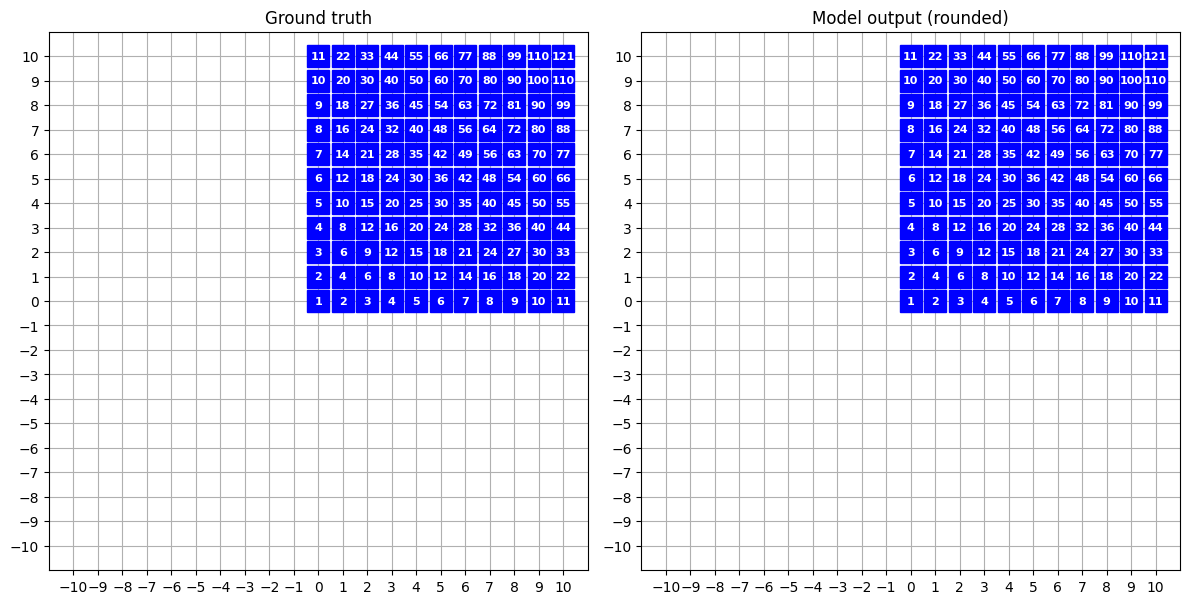

In [7]:

# SOMETHING THAT WOULD BE NICE: RED BACKGROUNDS FOR THE SLOTS WHERE THE MODEL OUTPUT DIFFERS FROM THE GROUND TRUTH

grid1 = convert_data_to_grid(k_list,label_list)
title1 = "Ground truth"

grid2 = convert_data_to_grid(k_list,label_list)
title2 = "Model output (rounded)"


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 12))

draw_grid(grid1, ax1, title1)
draw_grid(grid2, ax2, title2)

plt.tight_layout()
plt.show()

## Checking individual layer behaviours

In [8]:
doms_hidden_weights = model.get_layer('doms_hidden').get_weights()
doms_out_weights = model.get_layer('doms_out').get_weights()
pols_out_weights = model.get_layer('pols_out').get_weights()

doms_hidden_copy = Dense(units=num_hyps, input_shape=(2,), 
        activation='sigmoid',
        weights=doms_hidden_weights,
        use_bias=False, name='doms_hidden_copy')(k_input)
doms_out_copy = Dense(units=num_doms,
        activation='sigmoid',
        trainable=False,
        weights=doms_out_weights,
        bias_initializer='ones', name='doms_out_copy')(doms_hidden)
pols_out_copy = Dense(units=num_doms, input_shape=(6,), 
        use_bias=False,
        weights=pols_out_weights,
        name='pols_out_copy')(k_quad_input)
final_pol_out_copy = Dot(axes=1)([doms_out,pols_out])

model_test = Model(inputs=[k_input], outputs=[doms_out_copy])

model_test.predict([[10,0]])

1/1 [==============================] - 0s 108ms/step


array([[9.5711562e-07, 1.7528114e-06, 2.1366376e-01, 1.0044714e-07]],
      dtype=float32)

In [9]:
print(bias_array)
print(weights_array)

[-500. -100. -100.  300.]
[[ 400.  400. -400. -400.]
 [ 400. -400.  400. -400.]]


# Checking the trained model

In [10]:
model.weights

[<tf.Variable 'doms_hidden/kernel:0' shape=(2, 2) dtype=float32, numpy=
 array([[  9.031716 ,  -3.478834 ],
        [  1.1211295, -17.981361 ]], dtype=float32)>,
 <tf.Variable 'doms_out/kernel:0' shape=(2, 4) dtype=float32, numpy=
 array([[-5.2538047, -4.6447296,  4.4698534, -6.992781 ],
        [-5.561904 , -5.313489 , -5.6045027, -5.896443 ]], dtype=float32)>,
 <tf.Variable 'doms_out/bias:0' shape=(4,) dtype=float32, numpy=array([-8.6055355, -8.609558 , -5.7728343, -9.120852 ], dtype=float32)>,
 <tf.Variable 'pols_out/kernel:0' shape=(6, 4) dtype=float32, numpy=
 array([[ 2.291641  ,  0.9920529 ,  2.2167358 ,  1.0462198 ],
        [10.539275  ,  9.757799  ,  5.78733   ,  9.621493  ],
        [ 6.181839  ,  7.571673  ,  4.4990406 ,  5.015021  ],
        [ 1.8285315 ,  1.5170512 , -0.08131851,  1.2339319 ],
        [ 3.3208084 ,  3.1155899 ,  4.6470003 ,  2.5700178 ],
        [-2.6744342 , -1.7463225 ,  0.04135951, -3.9273117 ]],
       dtype=float32)>]

In [11]:
temp = 10

print(ks[-10:])
print(labels[-10:])


model.predict([ks[-10:],kquads[-10:]])

[[10  1]
 [10  2]
 [10  3]
 [10  4]
 [10  5]
 [10  6]
 [10  7]
 [10  8]
 [10  9]
 [10 10]]
[ 22  33  44  55  66  77  88  99 110 121]
1/1 [==============================] - 0s 66ms/step


array([[ 22.001497],
       [ 32.918335],
       [ 43.852837],
       [ 54.805   ],
       [ 65.77483 ],
       [ 76.762314],
       [ 87.76746 ],
       [ 98.790276],
       [109.83075 ],
       [120.88888 ]], dtype=float32)

In [12]:
model.predict([np.array([[0,0]]),np.array([[1,0,0,0,0,0]])])

1/1 [==============================] - 0s 24ms/step


array([[0.00390679]], dtype=float32)

In [13]:
temp = 10

print(ks[:10])
print(labels[:10])


model.predict([ks[:10],kquads[:10]])

[[-10 -10]
 [-10  -9]
 [-10  -8]
 [-10  -7]
 [-10  -6]
 [-10  -5]
 [-10  -4]
 [-10  -3]
 [-10  -2]
 [-10  -1]]
[0 0 0 0 0 0 0 0 0 0]
1/1 [==============================] - 0s 25ms/step


array([[ 4.2385105e-03],
       [ 3.7904244e-03],
       [ 3.3340256e-03],
       [ 2.8693143e-03],
       [ 2.3962897e-03],
       [ 1.9149521e-03],
       [ 1.4253021e-03],
       [ 9.2733913e-04],
       [ 4.2106339e-04],
       [-9.3525130e-05]], dtype=float32)